In [27]:
#Importing packages

import pandas as pd
import io
from math import sqrt
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
from scipy import stats
import math
from sklearn.metrics import mean_squared_error
from decimal import Decimal
import timeit

## Setting defaults for plots
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['axes.linewidth'] = 2

In [28]:
# Defining important functions
def generate_random_weights(num):
    return np.random.exponential(1, num)

def R(x,w): 
    # To store the required sum 
    s = 0; 
    n = len(x)
    for i in range(0,n): 
        # Add factorial of all the elements 
        s += math.lgamma(x[i]+1) * w[i];
        #s += math.log(math.factorial(x[i]))*w[i]; 
    return s


def Likelihood(theta,x,w = None):
    if w is None:
         w = np.ones(len(x))
    S = np.sum(x*w)
    n = np.sum(w) #n if weights equal 1, sum otherwise
    theta = theta+0.00000000001
    L = math.log(theta) * S - n *theta # - R(x,w)
    return L

def MLE_estimator(x, w = None):
    if w is None:
         w = np.ones(len(x))
    S = np.sum(x*w)
    n = np.sum(w)
    MLE = S/n
    return MLE

# For stepwise function plot
def mystep(x,y,z, ax=None, **kwargs):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    X = np.c_[x[:-1],x[1:],x[1:]]
    Y = np.c_[y[:-1],y[:-1],np.zeros_like(x[:-1])*np.nan]
    Z = np.c_[z[:-1],z[:-1],np.zeros_like(x[:-1])*np.nan]
    plt.figure(figsize=(15,8))
    if not ax: ax=plt.gca()
    ax.plot(X.flatten(), Z.flatten(), **kwargs)
    return ax.plot(X.flatten(), Y.flatten(), **kwargs)

## New functions

def poisson(yi, theta):
    theta=theta + 0.0000000000001
    l = (theta**(yi)*math.exp(-theta)) #/math.factorial(yi)
    #l = stats.poisson.pmf(k=yi, mu=theta)
    return(math.log(l))

vpoisson = np.vectorize(poisson)


def weights_matrix(num, length):
    weights = []
    for j in range(num):
        w = generate_random_weights(length) #weights for whole interval
        weights.append(w)
    weights= np.array(weights)
    return weights.T

def likelihoods(y, theta):
    l=[]
    for i in range(len(theta)):
        loglikes= vpoisson(y,theta[i])
        l.append(loglikes)
    return np.array(l).T


#Simplifying numpy notation
def plus(a,b,c=0,d=0,e=0,h=0,i=0,j=0,k=0, l=0):
    sum_of_all = np.add(a,np.add(b,np.add(c,np.add(d,np.add(e,np.add(h,np.add(i,np.add(j,np.add(k,l)))))))))
    return sum_of_all

def neg(a):
    neg_a = np.multiply(a,-1)
    return neg_a

def product(a,b,c=1,d=1,e=1,h=1,i=1,j=1):
    product_of_all = np.multiply(a,np.multiply(b,np.multiply(c,np.multiply(d,np.multiply(e,np.multiply(h,np.multiply(i,j)))))))
    return product_of_all

#simulate data
def simulate(types, means, lengths):
    n=len(means)
    Y = np.array([])
    if types is 'constant':
        for i in range(0,n) :
            ts = np.repeat(means[i],lengths[i])
            Y = np.hstack((Y, ts))

    elif types is 'exponential':
        for i in range(0,n) :
            ts= np.array((np.random.exponential(size=lengths[i], scale=means[i])))
            Y = np.hstack((Y, ts))   

    elif types is 'normal':
        for i in range(0,n) :
            ts= np.array((np.random.normal(size=lengths[i], scale=means[i])))
            Y = np.hstack((Y, ts))
        #Scales the data to positive and integerize it
        print(f'new means are {np.array(means)-Y.min()}')
        Y= np.ceil(Y - Y.min()) 
    else:
        for i in range(0,n) :
            ts= np.array((np.random.poisson(size=lengths[i], lam=means[i])))
            Y = np.hstack((Y, ts))

    # simulated dates
    N = sum(lengths)
    Date= pd.date_range(end='1/4/2020',periods=N, freq='M')

    # initialise data of lists. 
    data = {'Date':Date,'N':Y} 
  
    # Creates pandas DataFrame. 
    DT_N = pd.DataFrame(data) 
    return DT_N

#Function for Confidence Interval
def norm_CI(data, alpha=0.95):
    n = len(data)
    m, se = np.mean(data, axis=1), np.std(data,axis=1)
    h = se * stats.norm.ppf((1+alpha)/2)
    return m,m-h, m+h

In [3]:
## Defining various simulation scenerios

lengths = np.array([[100,100,100],[100,100,100],[100,100,100],[100,100,100],[100,100,100],[100,100,100]\
           ,[199,1,100],[180,20,100], [180,20,100],[100,100,100]\
          ,[100,100,100]])

means = np.array([[0.01,0.1,1], [0.1,1,10], [1,10,20], [1,10,20],[1,10,20],[10,15,20]\
        ,[1,10,1],[10,7,10],[5,1,5], [0.1,1,10]\
         ,[0.1,1,10]])

types = ['constant', 'constant','constant', 'poisson','poisson', 'poisson'\
        , 'constant','constant', 'poisson','exponential'\
        ,'normal']

Simulation number:   1
Time:  22.450957242999948
total tests carried out are 51689 
Simulation number:   2
Time:  22.56705381100005
total tests carried out are 51638 
Simulation number:   3
Time:  22.589127648000158
total tests carried out are 51568 
Simulation number:   4
Time:  22.67570509799998
total tests carried out are 51648 
Simulation number:   5
Time:  22.526684710999916
total tests carried out are 51208 
Simulation number:   6
Time:  22.80235748500013
total tests carried out are 51497 
Simulation number:   7
Time:  22.671842181000102
total tests carried out are 51710 
Simulation number:   8
Time:  22.63249025099981
total tests carried out are 51562 
Simulation number:   9
Time:  22.666441794000093
total tests carried out are 51557 
Simulation number:   10
Time:  23.267779891000146
total tests carried out are 51642 


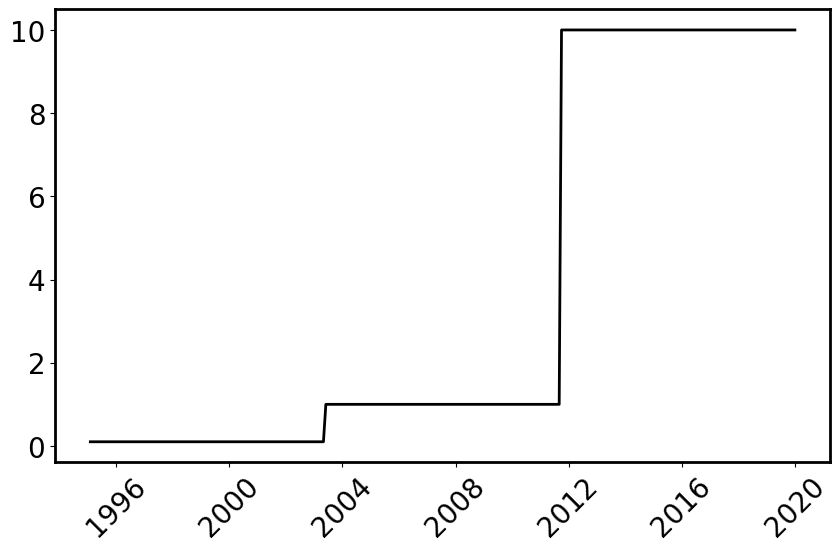

In [45]:
#Same simulation repeated multiple times

repeat_sim = 10 #select how many times you want to run the same simulation scenerio
dataset_number = 1 #select the simulation scenerio here
vec= np.repeat(dataset_number,repeat_sim)

count=0
for h in vec:
    count=count+1
    DT_N = simulate(types[h], means[h], lengths[h])
    Data_N= np.array(DT_N.N)
    
    if count == 1:
        plt.figure()
        plt.plot(DT_N.Date,DT_N.N, color = 'k')
        plt.tick_params(axis="x", labelsize=20, labelrotation = 45)
        plt.tick_params(axis="y", labelsize=20)
    #plt.xlabel('Year')
    #plt.ylabel('Count')

    #Making filename
        lengths_name = '-'.join(map(str, lengths[h])) 
        means_name = '-'.join(map(str, means[h])) 
        filename = str(dataset_number) +'_'+types[h]+'_'+lengths_name+'_'+means_name + '_data.png'
        plt.savefig(filename, transparent = True)
    
    # Initializing
    start = timeit.default_timer()
    io = Data_N.shape[0] #starting from final time
    c = 1.35 #from theory
    n_0 = 3 #Assuming homogeneity in first three month
    I_0 = list(Data_N[max(0,io-n_0):io])
    alpha = 0.95
    num_sim = 1 #define how many bootstraps 


    n_k_minus1 = n_0 
    I_k_minus1 = I_0

    windows = []
    MLEs = []
    scaled_windows = []
    tests=0
    for l in range(0, Data_N.shape[0]):
        #starting at a new point for each iteration
        io = Data_N.shape[0]-l
        #Arithmetic increase
        #K = int(io/n_0) 

        # Geometric increase
        K = max(0,math.ceil((math.log(io)-math.log(n_0))/math.log(c))) #Calculated this analytically
        I_0 = list(Data_N[max(0,io-n_0):io])
        I_k_minus1 = I_0
        for k in range(1,K+1): #started from 1 because 0th interval already homo and K+1 because last point is not inclusive
            
            #Arithmetic
            #n_k = (k+1)*n_0
            #n_k_plus1 = (k+2)*n_0
        
            #Geometric increase
            n_k = int(n_0 * c** k)
            n_k_plus1 = int(n_0 * c** (k+1))

            I_k = list(Data_N[max(0,io-n_k):io])
            I_k_plus1 = list(Data_N[max(0,io-n_k_plus1):io])
            MLE_I_k_plus1 = MLE_estimator(I_k_plus1)
            len_I_k_plus1 = len(I_k_plus1)
            J = list(range(max(0,io-n_k),io-n_k_minus1))
            T = []
            T_b = []
            BS_dist = []
            for i in J:
                #New intervals and their estimators
                A_k = np.array(Data_N[max(0,io-n_k_plus1):(i+1)])
                B_k = np.array(Data_N[i+1:io])
                MLE_A = MLE_estimator(A_k)
                MLE_B = MLE_estimator(B_k)

                # test statistics for this breakpoint and adding it to the list
                T_I_k = Likelihood(MLE_A, A_k) + Likelihood(MLE_B, B_k) - Likelihood(MLE_I_k_plus1, I_k_plus1)
                T.append(T_I_k)

                ## Bootstrap procedure
                #  Getting lengths of intervals

                len_A = len(A_k) #length of A_k
                len_B = len(B_k) #length of B_k

                #generating weights and
                #calculating estimators for the bootstrap intervals

                weights_A = weights_matrix(num_sim,len_A)
                sum_A_w = np.matmul(A_k,weights_A) 
                sum_wA= np.sum(weights_A,axis=0)
                MLEs_A_b= np.divide(sum_A_w,sum_wA)

                loglikes_A= likelihoods(A_k, MLEs_A_b)

                log_ratio_A = np.multiply(loglikes_A,weights_A)
                log_ratio_A = np.sum(log_ratio_A, axis=0)


                weights_B = weights_matrix(num_sim, len_B)
                sum_B_w = np.matmul(B_k,weights_B) 
                sum_wB= np.sum(weights_B,axis=0)
                MLEs_B_b= np.divide(sum_B_w,sum_wB)

                loglikes_B= likelihoods(B_k, MLEs_B_b)

                log_ratio_B = np.multiply(loglikes_B,weights_B)
                log_ratio_B = np.sum(log_ratio_B, axis=0)

                W = plus(sum_wA,sum_wB)

                term_in_sqrt = (plus(product(MLE_A**2,W**2),product(MLE_B**2,W**2), product(2,MLE_A,MLE_B,W**2), product(2,MLE_A,sum_A_w,W), product(2,MLE_B,sum_A_w,W),\
                            neg(product(2,MLE_A,sum_B_w,W)), neg(product(2,MLE_B,sum_B_w,W)), sum_A_w**2,sum_B_w**2,product(2,sum_A_w,sum_B_w)))**(1/2)
                MLE_p = np.divide(neg(plus(neg(sum_A_w),neg(sum_B_w),product(MLE_A,W),product(MLE_B,W),neg(term_in_sqrt))),product(2,W))

                loglikes_p1= likelihoods(A_k, MLE_p)
                log_ratio_p1 = np.multiply(loglikes_p1,weights_A)
                log_ratio_p1 = np.sum(log_ratio_p1, axis=0)


                loglikes_p2= likelihoods(B_k, plus(MLE_p,MLE_A,MLE_B))
                log_ratio_p2 = np.multiply(loglikes_p2,weights_B)
                log_ratio_p2 = np.sum(log_ratio_p2, axis=0)

                sup_term = log_ratio_p1 +log_ratio_p2  
                #Test statistic for bootstrap for this breakpoint
                T_I_k_b = np.subtract(np.add(log_ratio_A,log_ratio_B),sup_term)
                T_b.append(T_I_k_b)
                tests= tests+1
            if len(J)!=0:
                BS_dist = np.max(T_b,axis=0)
                test_value = max(T)
                critical_value = sqrt(2*np.quantile(BS_dist, alpha))
            else:
                 # since there are no changepoints, we provide artifical values to make the algo jump to the next interval
                test_value = 0
                critical_value = 1

            if test_value > critical_value:
                break
            else:
                continue
                I_k_minus1 = I_k
                n_k_minus1 = n_k
        if K==0:
            I_k = I_0
        windows.append(len(I_k))
        MLE_I_k = MLE_estimator(I_k)
        MLEs.append(MLE_I_k)
        scaled_windows.append(len(I_k)/io)
    stop = timeit.default_timer()
    print('Simulation number:  ', count)  
    print('Time: ', stop - start)  
    print(f'total tests carried out are {tests} ')
    
    MLEs.reverse()
    windows.reverse()
    scaled_windows.reverse()
    
    
    ## Saving data to CSV file

    DT_N['windows_'+str(count)] = windows
    DT_N['scaled_windows_'+str(count)] = scaled_windows
    DT_N['MLEs_'+str(count)] = MLEs
    filename = str(count) +'_'+types[h]+'_'+lengths_name+'_'+means_name + '.csv'
    DT_N.to_csv(filename, index=False)

# Combining all the files

In [46]:
h = dataset_number
lengths_name = '-'.join(map(str, lengths[h])) 
means_name = '-'.join(map(str, means[h])) 
filename_extra =  '_'+types[h]+'_'+lengths_name+'_'+means_name + '.csv'

# Getting names of all csv files
all_filenames=[]
for i in range(1,repeat_sim+1):
    filename = str(i)+ filename_extra
    all_filenames.append(filename)
# Making a dataframe by concatinating name
df = pd.concat([pd.read_csv(f) for f in all_filenames ],axis=1)

#Deleting the duplicated date column
df = df.loc[:,~df.columns.duplicated()]
# Sorting the dataframe aphabatically
df = df.reindex(sorted(df.columns), axis=1)
df.to_csv('combined_data.csv', index=False)

# Constructing confidence interval

In [47]:
filename = 'Dataset '+ str(dataset_number) +' for confidence band/' +  'combined_data.csv'
df= pd.read_csv(filename)
dates = [pd.to_datetime(d) for d in df.Date]
lengths_name = '-'.join(map(str, lengths[dataset_number])) 
means_name = '-'.join(map(str, means[dataset_number])) 

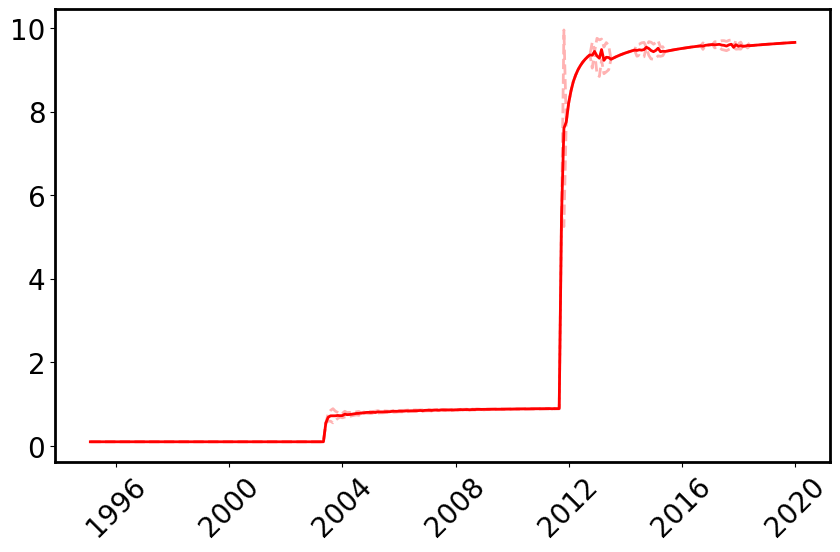

In [48]:
#CI plot
#Getting CIs for MLEs

#Fetching MLE data from dataframe
A= df.iloc[:,1:repeat_sim+1]
CI = norm_CI(A)
mu = CI[0]
lower = CI[1]
upper = CI[2]
plt.plot(dates,mu, color='r')
#plt.fill_between(dates,lower, upper, color='r', alpha=.10)
plt.plot(dates,upper, color='r', linestyle = '--', alpha=.30)
plt.plot(dates,lower, color='r', linestyle = '--', alpha=.30)
plt.tick_params(axis="x", labelsize=20, labelrotation = 45)
plt.tick_params(axis="y", labelsize=20)
filename = str(dataset_number) +'_'+types[dataset_number]+'_'+lengths_name+'_'+means_name + '_MLEs.png'
plt.savefig(filename, transparent = True)

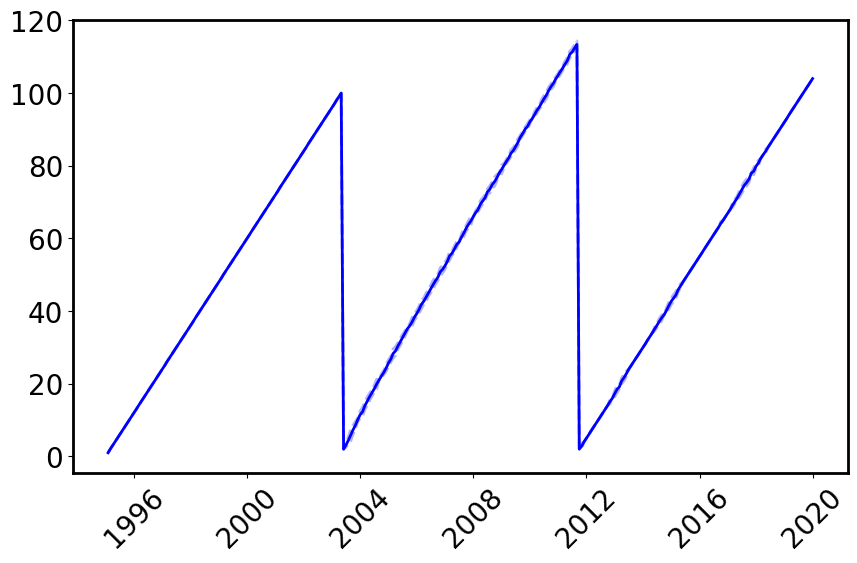

In [49]:
# Fetching windows data from dataframe
A= df.iloc[:,-repeat_sim:]

#Getting CIs
CI = norm_CI(A)
mu = CI[0]
lower = CI[1]
upper = CI[2]
#CI plot
plt.plot(dates,mu, color='b')
plt.plot(dates,upper, color='b', linestyle = '--', alpha=.30)
plt.plot(dates,lower, color='b', linestyle = '--', alpha=.30)
plt.tick_params(axis="x", labelsize=20, labelrotation = 45)
plt.tick_params(axis="y", labelsize=20)
filename = str(dataset_number) +'_'+types[dataset_number]+'_'+lengths_name+'_'+means_name + '_windows.png'
plt.savefig(filename, transparent = True)

In [50]:
#Making a new column of MLEs in data 
col = df.loc[: , "MLEs_1":"MLEs_9"]
df['MLEs'] = col.mean(axis=1)

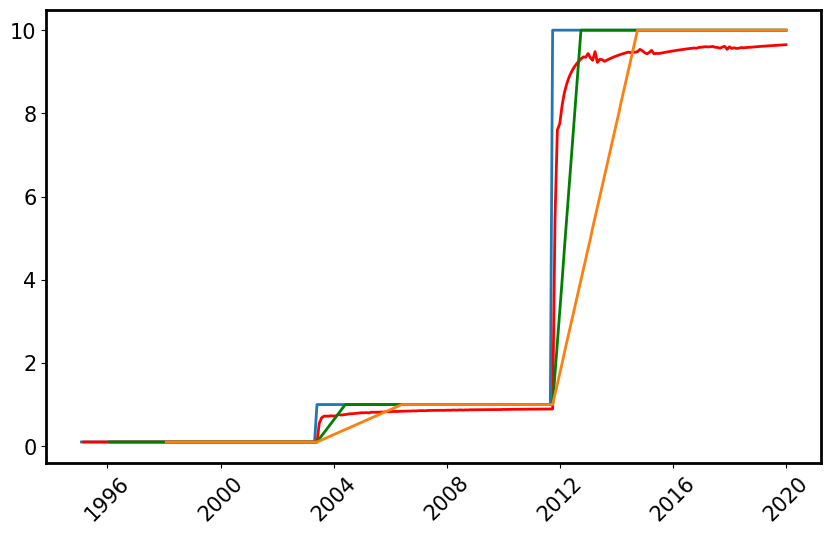

In [51]:
DT_N = df
nop=1 #number of periods ahead to forecast 

#DT_N.N.plot(label='Number of M&A')
#DT_N.MLEs.plot(label='MLEs')
DT_N['forecast'] = DT_N.MLEs.shift(nop, fill_value=None)
dates = [pd.to_datetime(d) for d in DT_N.Date]
#DT_N.N.plot(label='Number of M&A',color = 'k' )
plt.plot(dates, DT_N.N)
plt.plot(dates,DT_N.forecast, linestyle='-', color = 'r')
#plt.xlabel('Year')

# Calculating moving averages using rolling window with time period 12 -we use mean because the max likelihood
# estimator of poisson is sample mean 

MovingAverage_year = DT_N.rolling(12).mean()
MovingAverage_year['forecast'] = MovingAverage_year.N.shift(nop, fill_value=None)
plt.plot(dates, MovingAverage_year.forecast, color = 'g')

# Calculating moving averages
MovingAverage_3year = DT_N.rolling(36).mean()
MovingAverage_3year['forecast'] = MovingAverage_3year.N.shift(nop, fill_value=None)
plt.plot(dates, MovingAverage_3year.forecast)

plt.tick_params(axis="x", labelrotation = 45)
#plt.legend()

sim_fig_name= 'Dataset '+ str(dataset_number) +' for confidence band/' + 'simulations_comparision.png'
plt.savefig(sim_fig_name , transparent = True)

In [52]:
#Idea: Take the last point (13th from the last) as estimate and use it as prediction of next n months

n=3
MovingAverage_year = DT_N.rolling(12).mean()
MovingAverage_3year = DT_N.rolling(55).mean()

print('1-year fixed estimate is: ', MovingAverage_year.iloc[-(n+1)].N)
print('3-year fixed estimate is: ', MovingAverage_3year.iloc[-(n+1)].N)
print('LPA  estimate is: ', DT_N.iloc[-(n+1)].MLEs)

print('1-year fixed MAE is: ', sum(abs(MovingAverage_year.iloc[-(n+1)].N - DT_N.N.tail(n)))/n)
print('3-year fixed MAE is: ', sum(abs(MovingAverage_3year.iloc[-(n+1)].N - DT_N.N.tail(n)))/n)
print('LPA  MAE is: ', sum(abs(DT_N.iloc[-(n+1)].MLEs - DT_N.N.tail(n)))/n)

print('1-year fixed MSE is: ', mean_squared_error(np.repeat(MovingAverage_year.iloc[-(n+1)].N,n), DT_N.N.tail(n)))
print('3-year fixed MSE is: ', mean_squared_error(np.repeat(MovingAverage_3year.iloc[-(n+1)].N,n), DT_N.N.tail(n)))
print('LPA  MSE is: ', mean_squared_error(np.repeat(DT_N.iloc[-(n+1)].MLEs,n), DT_N.N.tail(n)))

1-year fixed estimate is:  10.0
3-year fixed estimate is:  10.0
LPA  estimate is:  9.643564356435645
1-year fixed MAE is:  0.0
3-year fixed MAE is:  0.0
LPA  MAE is:  0.356435643564355
1-year fixed MSE is:  0.0
3-year fixed MSE is:  0.0
LPA  MSE is:  0.1270463680031359
